In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [3]:
df = pd.read_csv("house_price.csv")

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


## 1. Basic EDA (Exploratory Data Analysis)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [9]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [12]:
# Get summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [16]:
# Check data types
print("\nData Types:\n", df.dtypes)


Data Types:
 location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object


In [18]:
# Count unique values in categorical columns (if any)
for col in df.select_dtypes(include=["object"]).columns:
    print(f"\nUnique values in {col}:\n", df[col].value_counts())


Unique values in location:
 location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

Unique values in size:
 size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64


###  Visualizations

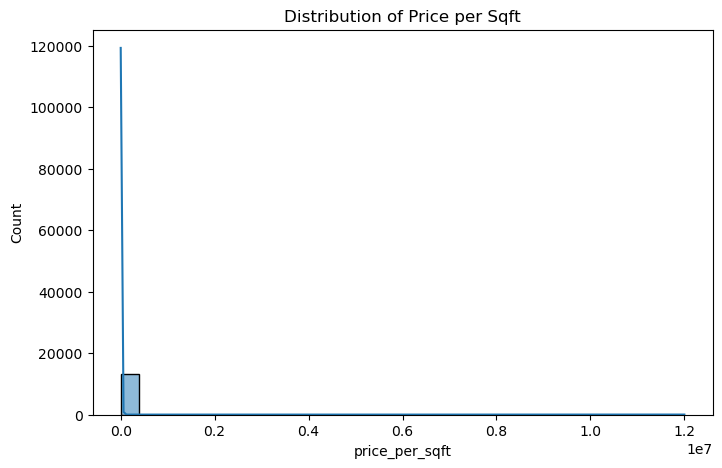

In [24]:
# 1. Distribution of Price per Square Foot
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft"], kde=True, bins=30)
plt.title("Distribution of Price per Sqft")
plt.show()

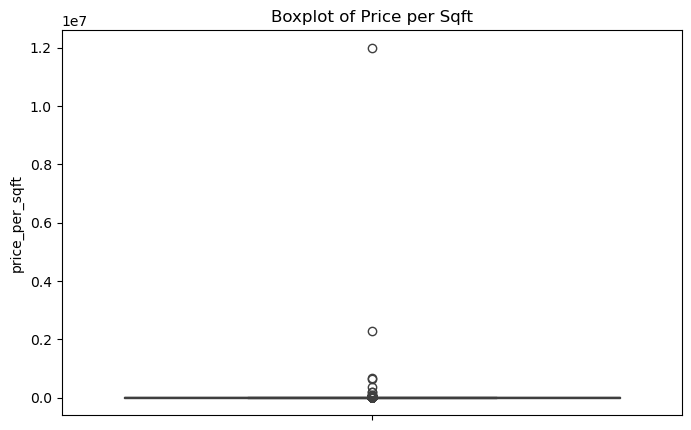

In [26]:
# 2. Boxplot to Detect Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["price_per_sqft"])
plt.title("Boxplot of Price per Sqft")
plt.show()

In [32]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

In [34]:
# Check if there are numeric columns
print("Numeric Columns:\n", df_numeric.columns)


Numeric Columns:
 Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')


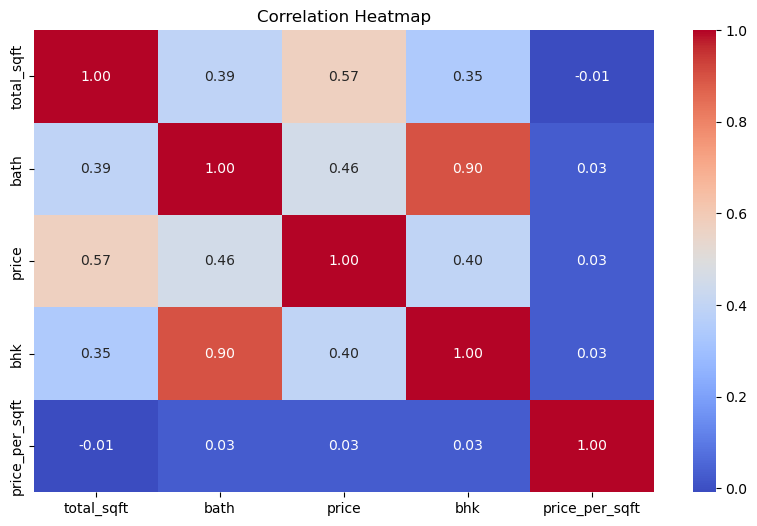

In [36]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 2. Detecting outliers and fixing it

In [40]:
# Describe the price_per_sqft column
print(df["price_per_sqft"].describe())

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


In [42]:
# Calculate statistics for outlier detection

mean_val = df["price_per_sqft"].mean()
std_val = df["price_per_sqft"].std()
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1

In [44]:
# Outlier thresholds     # Assuming data follows a normal distribution
lower_bound_std = mean_val - 3 * std_val
upper_bound_std = mean_val + 3 * std_val
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
lower_bound_perc = df["price_per_sqft"].quantile(0.01)
upper_bound_perc = df["price_per_sqft"].quantile(0.99)

In [48]:
# Outlier detection counts
outliers_std = df[(df["price_per_sqft"] < lower_bound_std) | (df["price_per_sqft"] > upper_bound_std)]
outliers_iqr = df[(df["price_per_sqft"] < lower_bound_iqr) | (df["price_per_sqft"] > upper_bound_iqr)]
outliers_perc = df[(df["price_per_sqft"] < lower_bound_perc) | (df["price_per_sqft"] > upper_bound_perc)]

In [50]:
df["z_score"] = zscore(df["price_per_sqft"])
outliers_z = df[(df["z_score"] > 3) | (df["z_score"] < -3)]

In [52]:
print(f"Outliers detected - Std Dev method: {len(outliers_std)}")
print(f"Outliers detected - IQR method: {len(outliers_iqr)}")
print(f"Outliers detected - Percentile method: {len(outliers_perc)}")
print(f"Outliers detected - Z-score method: {len(outliers_z)}")

Outliers detected - Std Dev method: 5
Outliers detected - IQR method: 1265
Outliers detected - Percentile method: 259
Outliers detected - Z-score method: 5


In [54]:
# Outlier removal methods
df_trimmed = df[(df["price_per_sqft"] >= lower_bound_iqr) & (df["price_per_sqft"] <= upper_bound_iqr)]
df_capped = df.copy()
df_capped["price_per_sqft"] = np.clip(df_capped["price_per_sqft"], lower_bound_perc, upper_bound_perc)

median_value = df["price_per_sqft"].median()
df_imputed = df.copy()
df_imputed.loc[(df["price_per_sqft"] < lower_bound_perc) | (df["price_per_sqft"] > upper_bound_perc), "price_per_sqft"] = median_value


## 3.Create a box plot and use this to determine which method seems to work best to remove outliers

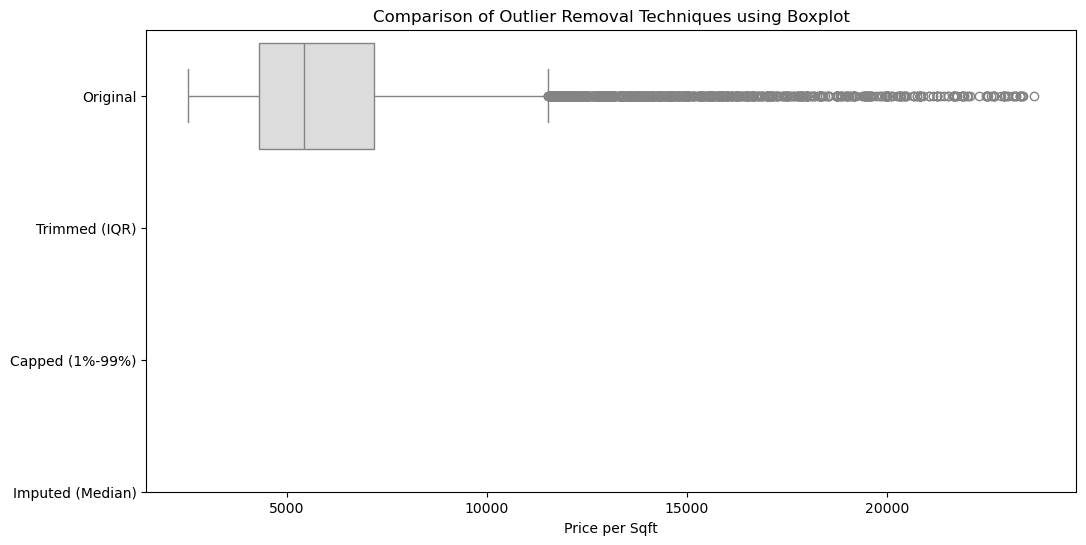

In [56]:
# Box Plot Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df["price_per_sqft"], df_trimmed["price_per_sqft"], df_capped["price_per_sqft"], df_imputed["price_per_sqft"]], 
            orient="h", palette="coolwarm")
plt.yticks([0, 1, 2, 3], ["Original", "Trimmed (IQR)", "Capped (1%-99%)", "Imputed (Median)"])
plt.xlabel("Price per Sqft")
plt.title("Comparison of Outlier Removal Techniques using Boxplot")
plt.show()

## 4.Histogram for Normality Check

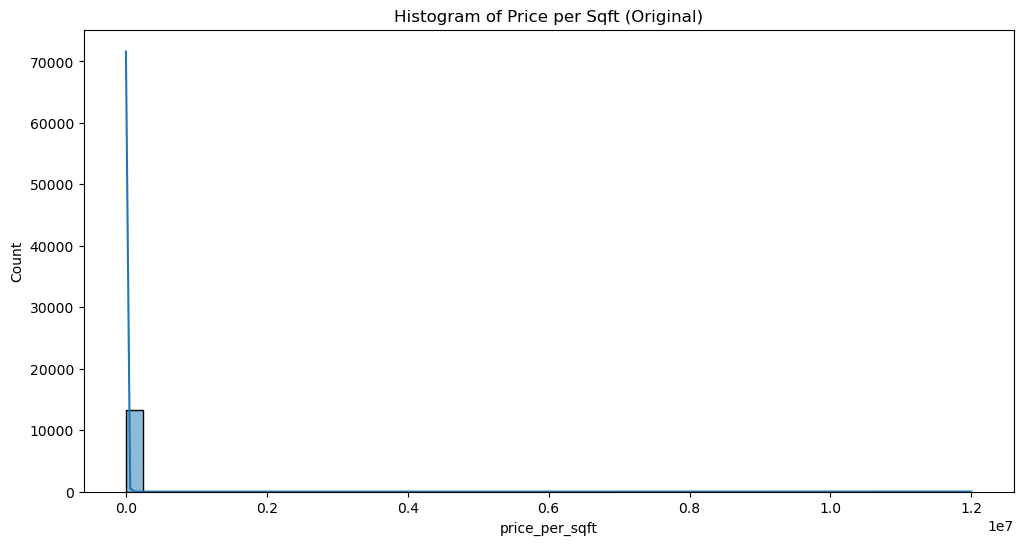

In [58]:

plt.figure(figsize=(12, 6))
sns.histplot(df["price_per_sqft"], kde=True, bins=50)
plt.title("Histogram of Price per Sqft (Original)")
plt.show()

In [60]:
# Skewness and Kurtosis before transformation
print(f"Skewness before transformation: {df['price_per_sqft'].skew()}")
print(f"Kurtosis before transformation: {df['price_per_sqft'].kurt()}")


Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


In [62]:
# Log Transformation
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])

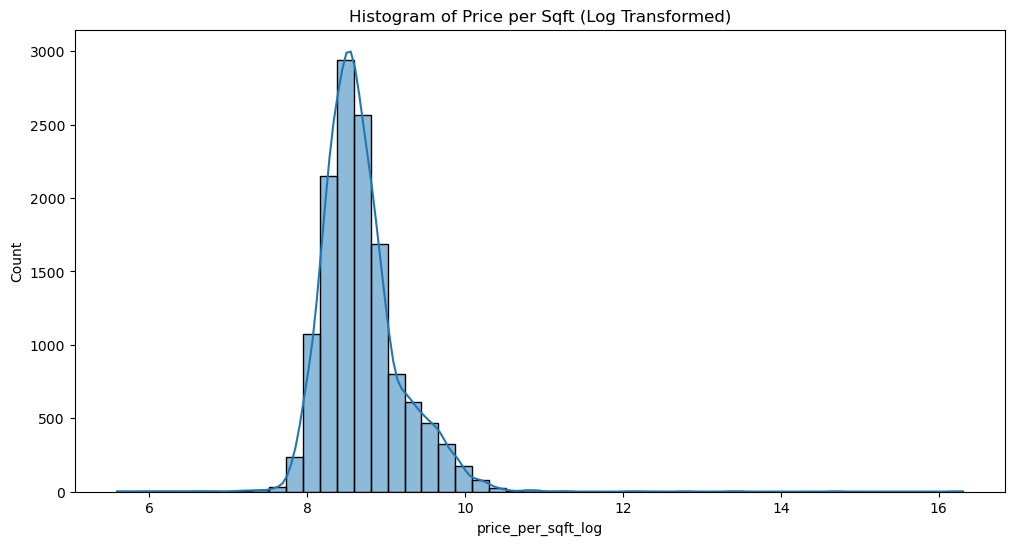

In [64]:
# Histogram after transformation
plt.figure(figsize=(12, 6))
sns.histplot(df["price_per_sqft_log"], kde=True, bins=50)
plt.title("Histogram of Price per Sqft (Log Transformed)")
plt.show()

In [66]:
# Skewness and Kurtosis after transformation
print(f"Skewness after transformation: {df['price_per_sqft_log'].skew()}")
print(f"Kurtosis after transformation: {df['price_per_sqft_log'].kurt()}")

Skewness after transformation: 1.4004850530059296
Kurtosis after transformation: 9.206942162860814


##  5. Check the correlation between all the numerical columns and plot heatmap

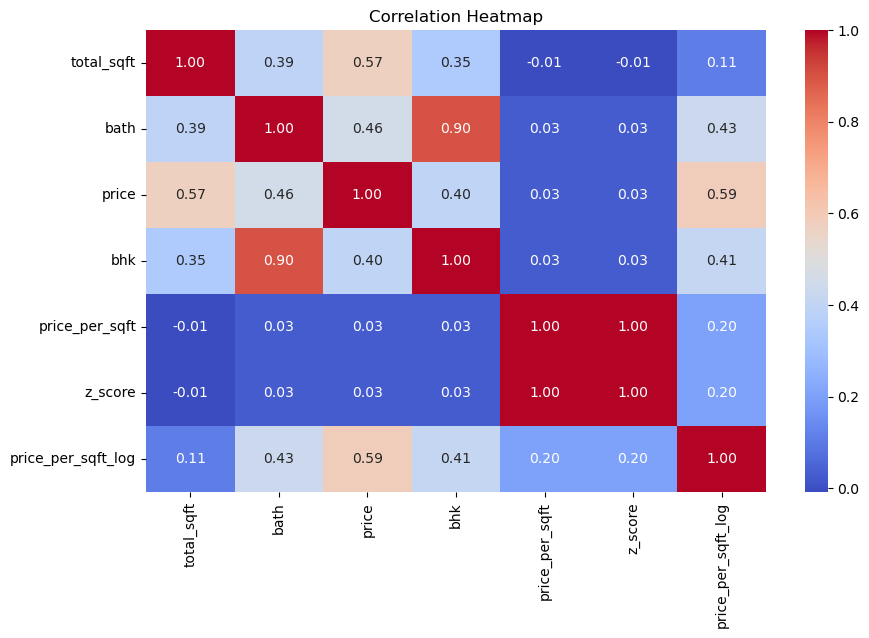

In [70]:
# Correlation Heatmap
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])


# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 6.Draw Scatter plot between the variables to check the correlation between them.

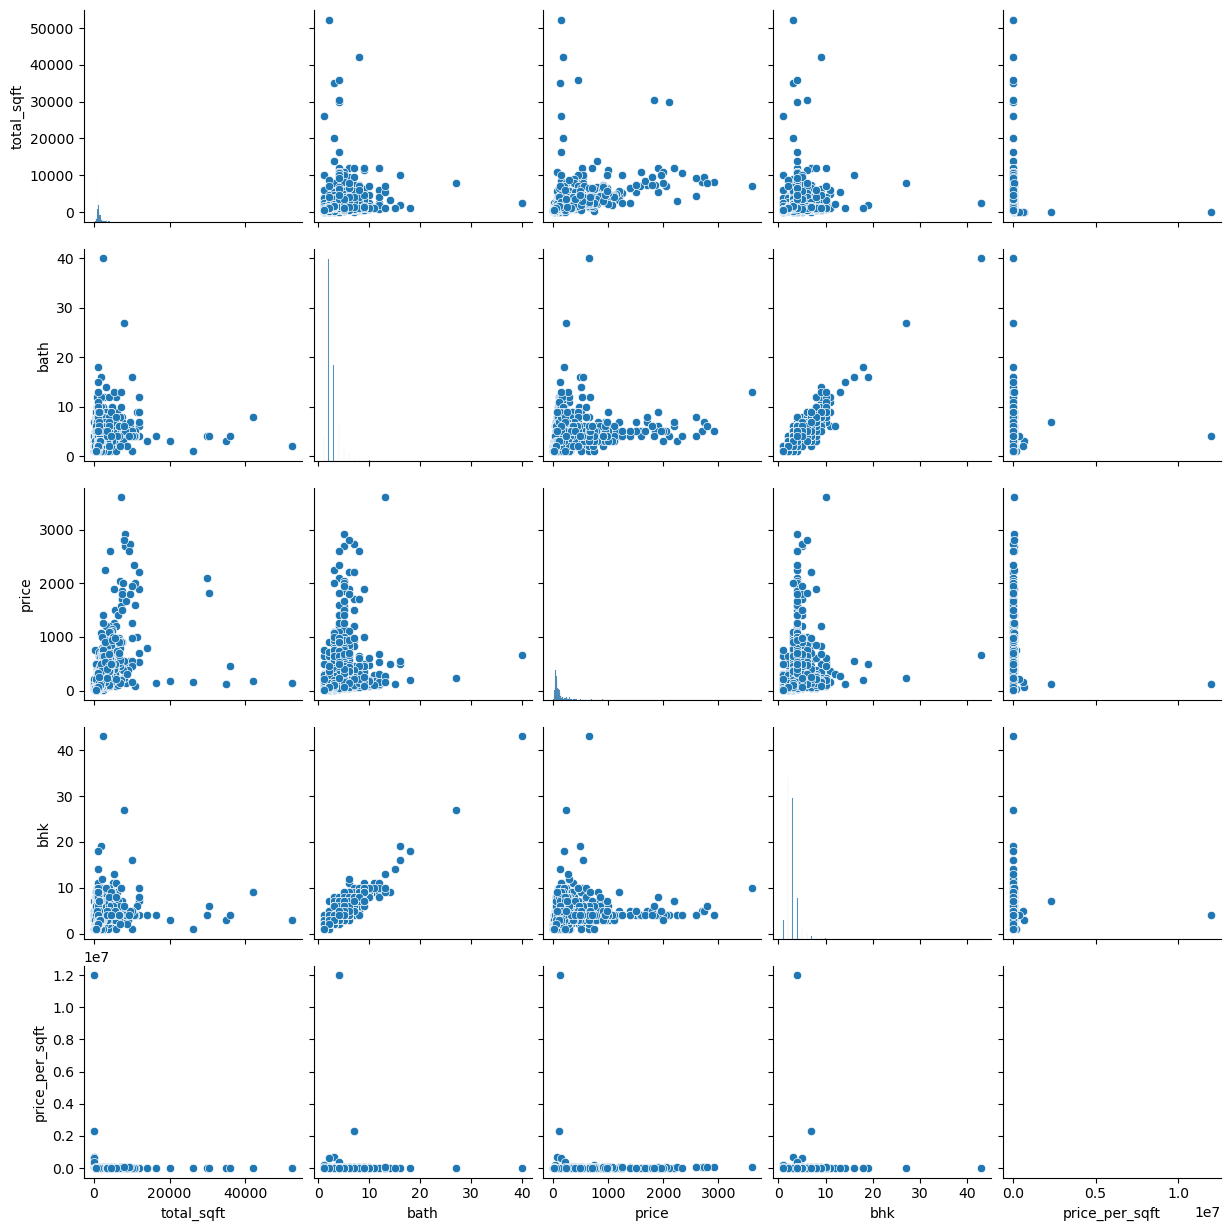

In [73]:
# Scatter Plots to Check Correlation
sns.pairplot(df[["total_sqft", "bath", "price", "bhk", "price_per_sqft"]])
plt.show()

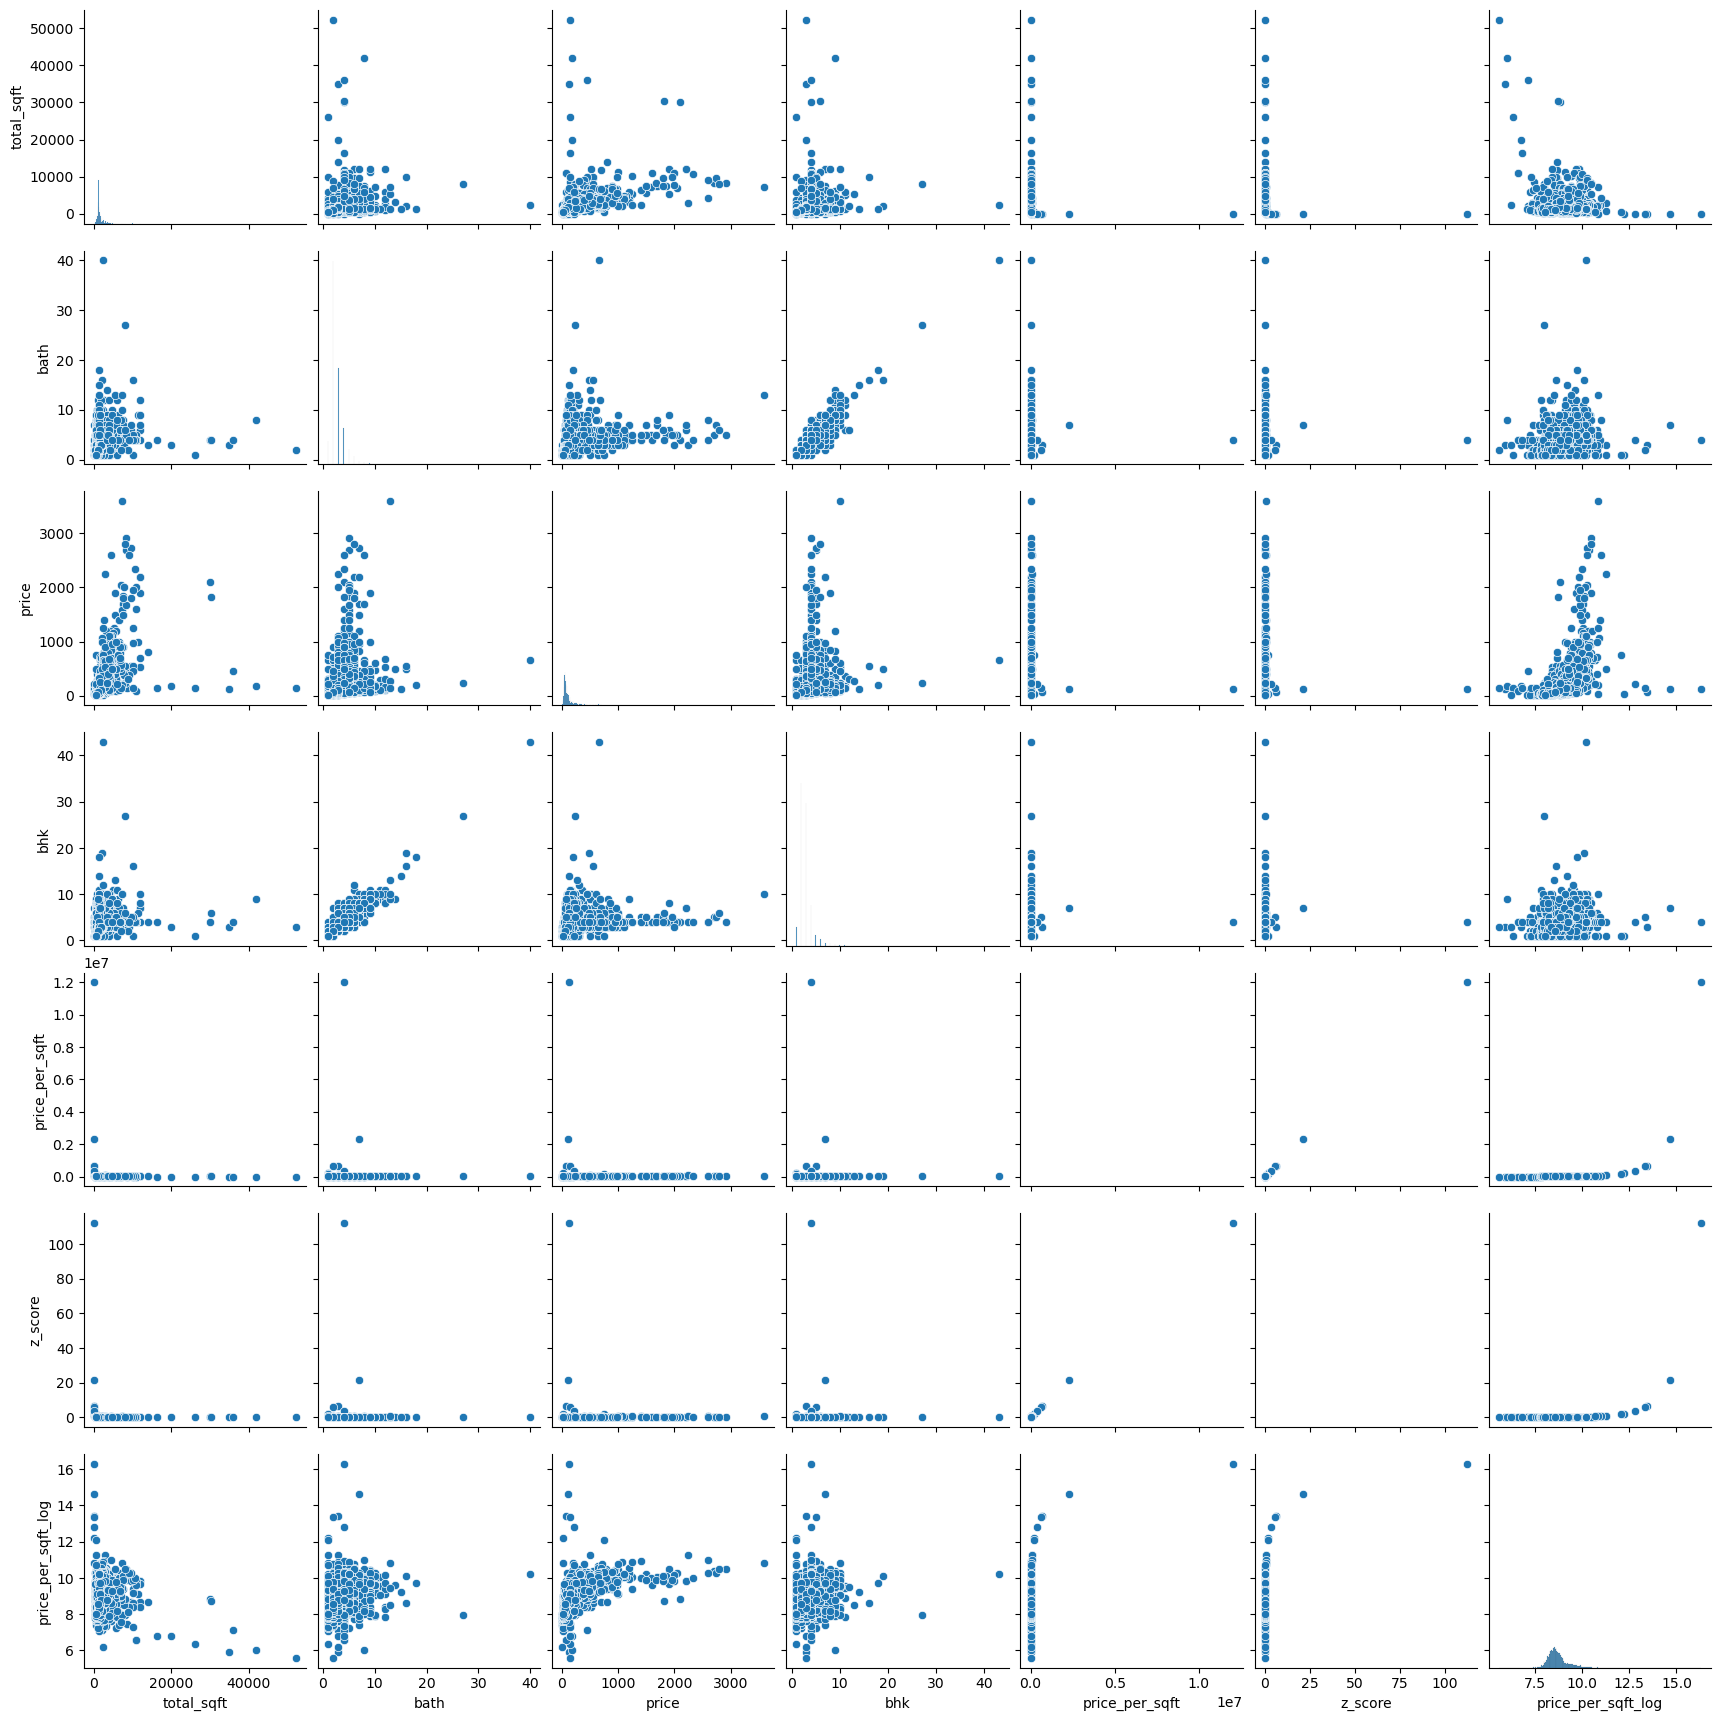

In [75]:
df_numeric = df.select_dtypes(include=['number'])
sns.pairplot(df_numeric)
plt.show()